<a href="https://colab.research.google.com/github/FarhinaMirza/CE888/blob/main/lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [4]:
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [5]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  tmp_arr = np.random.choice(x, (n_bootstraps, sample_size))
  data_mean = np.mean(tmp_arr)
  means_of_each_row = np.zeros(n_bootstraps)
  for i in range(n_bootstraps):
    means_of_each_row[i] = np.mean(tmp_arr[i, :])
  lower = np.percentile(means_of_each_row, 2.5)
  upper = np.percentile(means_of_each_row, 97.5)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

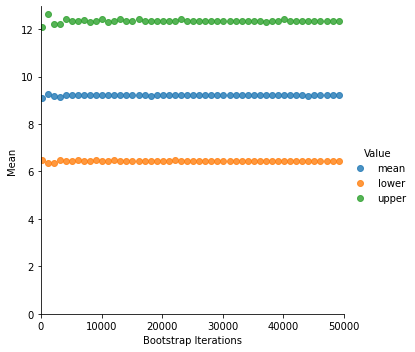

In [6]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.

In [7]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  tmp_arr = np.random.choice(sample, (n_bootstraps, sample_size))
  data_mean = np.mean(tmp_arr)
  means_of_each_row = np.zeros(n_bootstraps)
  for counter in range(n_bootstraps):
    means_of_each_row[counter] = np.mean(tmp_arr[counter, :])
  lower = np.percentile(means_of_each_row, (100 - ci) / 2)
  upper = np.percentile(means_of_each_row, 100 - (100 - ci) / 2)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

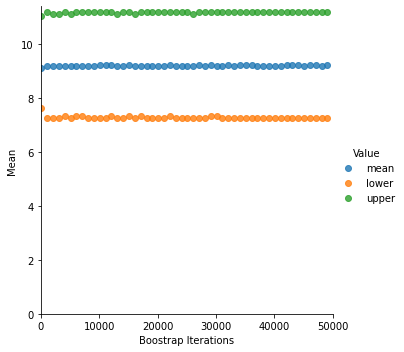

In [8]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [9]:
# Confidence interval 
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	bootS_array = np.random.choice(sample,(n_bootstraps, sample_size))
	data_mean = np.std(bootS_array)
	bootStraps_mean = np.std(bootS_array, axis=1)
	lower = np.percentile(bootStraps_mean, (100-ci)/2)
	upper = np.percentile(bootStraps_mean, (ci+(100-ci)/2))
	return data_mean, lower, upper

In [10]:
# The 95% confidence interval for the mean of the customers dataset using 10000 iterations.
print(bootstrap_std_ci(data, data.shape[0], 10000, 95))

(5.689542079772326, 2.715131383704581, 7.391390468729446)


## Vehicles dataset

### Now let's work on a different dataset, which is stored in the vehicles.csv file.

In [11]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df.head()
dfCurr = df.iloc[:,0]
dfNew = df.iloc[:,1]
dfNew = dfNew.dropna()
dataCurr = dfCurr.values
dataNew = dfNew.values

# Note: you can add more cells as needed to organise your code and your plots

Compare the two fleets
The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:

  Construct the 95% CI of the mean of the current fleet.

  Construct the 95% CI of the mean of the new fleet.
  
  Are they comparable? (i.e., is one better than the other?) -- you can do  this  with a permutation test (check the lecture notes!)




In [12]:
# <---INSERT YOUR CODE HERE--->
current_mean, new_mean = np.mean(df, axis=0)
print(current_mean, new_mean)
print("Current fleet: " + str(bootstrap_mean_ci(dataCurr, dataCurr.shape[0], 10000, 95)))
print("New fleet: " + str(bootstrap_mean_ci(dataNew, dataCurr.shape[0], 10000, 95)))

20.14457831325301 30.481012658227847
Current fleet: (20.139111646586347, 19.36144578313253, 20.93975903614458)
New fleet: (30.474855421686748, 29.714859437751002, 31.224899598393574)


In [13]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """

    total_Obs = np.mean(sample2) - np.mean(sample1)
    pValue = 0
    concat = np.concatenate((sample1,sample2))
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        nSample1 = perm[:len(sample1)]
        nSample2 = perm[len(sample2):]

        if (np.mean(nSample2)-np.mean(nSample1)) > total_Obs:
            pValue += 1
    return pValue/n_permutations


In [24]:
# Question 2: The 60% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations
print(bootstrap_mean_ci(dataNew, dataNew.shape[0], 10000, 80))

(30.486163291139242, 29.60759493670886, 31.367088607594937)


In [15]:
# Question 3: The 80% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations is
print(bootstrap_mean_ci(dataNew, dataNew.shape[0], 10000, 80))

(30.479284810126583, 29.60759493670886, 31.367088607594937)


In [27]:
# Question 4: The 73% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is
print(bootstrap_std_ci(dataNew, dataNew.shape[0], 10000, 85))

(6.068681038671941, 5.366418336252825, 6.676689637233132)


In [26]:
# Question 5: The 95% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is
print(bootstrap_std_ci(dataCurr, dataCurr.shape[0], 10000, 99))

(6.403143971042721, 5.62578982177379, 7.1113862370250045)


In [18]:
print("p-value for vehicle data set at 30000 iterations is: " + str(permut_test(dataCurr, dataNew, 30000)))

p-value for vehicle data set at 30000 iterations is: 0.0


In [19]:
# If an alpha of 0.5 is assumed, a p-value of 0.0 indicates that we can refute the H0 hypothesis.

## Voting Dataset

In [20]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [23]:
num_values_PA = len(dem_share_PA)
print(num_values_PA)
num_values_OH = len(dem_share_OH)
print(num_values_OH)

# Question 8: The 98% confidence intervals for the means of the votes using 100000 bootstraps are (give two decimal values, e.g., 1.23):
print('For OH:', bootstrap_mean_ci(np.array(dem_share_OH), num_values_OH, 100000, 98))
print('For PA:', bootstrap_mean_ci(np.array(dem_share_PA), num_values_PA, 100000, 98))

# Question 8: The p-value from a permutation test with 30000 permutations is
print(permut_test(np.array(dem_share_OH), np.array(dem_share_PA), 30000))

67
88
For OH: (44.32040060681815, 41.87556363636364, 46.7623875)
For PA: (45.47434751940292, 42.801188059701495, 48.318662686567166)
0.18643333333333334
